## CS-A1160 - Beginner's Python for Engineers - Group 12

### Project Description

Our team will focus on studying the relationship (if any) of the average land temperature and the evolution of population in such land, along with its GDP. Datasets will be pulled from the World Bank and are available in `.csv`, `.xml` and `.xlsx` formats in the following links, respectively:

[Population](https://data.worldbank.org/indicator/SP.POP.TOTL)

[GDP (2015 USD)](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD)

Behavior will be analysed mainly by visual means (such as scatterplots, pyramid populations, etc.) and reported in Markdown in the corresponding .ipynb file. 

> GitHub Links

[GitHub-Link-Project](https://github.com/ArisMei/Beg-python-project)

[GitHub-Link-Final-Submision](https://github.com/ArisMei/Beg-python-project/blob/master/analysis/project-notebook-12.ipynb)

> Imported libraries

In [243]:
import pandas as pd # For data manipulation
import geopandas # For map visualization
import folium # For map visualization
import pycountry # For inconsistent country names
import numpy as np # linear algebra
import pycountry_convert as pc # To map ISO 3 countries to continents
from matplotlib import pyplot as plt
from matplotlib import font_manager # To change our chart's font family
import matplotlib.dates as mdates # To make date axis look nice
import seaborn as sns
from PIL import Image # To load and show images

> Previous calculations

Create a dictionary of inconsistent country names and their standardized names:

In [244]:
country_dict = {}
for country in pycountry.countries:
    country_dict[country.name] = country.name
    country_dict[country.alpha_2] = country.name
    country_dict[country.alpha_3] = country.name

---

## Programming Component


### Reading and cleaning the main dataset


In [245]:
df = pd.read_csv('..\data\land-data\GlobalLandTemperaturesByCountry.csv') # Reading GlobalLandTemperaturesByCountry csv file
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Next setp will be convert `dt` colum in to a date type one and we will only be focusing in the `year` information. 

In [246]:
df.dt = pd.to_datetime(df.dt) # Convert to datetime
df.dt = df.dt.dt.year # Extract year

In [247]:
df.rename(columns={"dt": "Year"}, inplace=True) # Rename column
df_year_temp =df.groupby(['Country', 'Year']).mean() # Group by country and year
df_year_temp.drop(columns=['AverageTemperatureUncertainty'], inplace=True) # Drop unnecessary column
df_year_temp.head() 

AverageTemperature
Country     Year                    
Afghanistan 1838           18.379571
            1839                 NaN
            1840           13.413455
            1841           13.997600
            1842           15.154667

In [248]:
df_year_temp.reset_index(inplace=True) # Let's reset the index so that we can use the Country and Year columns as a key to merge with the other datasets
df_year_temp.head()

,Country,Year,AverageTemperature
0,Afghanistan,1838,18.379571
1,Afghanistan,1839,NaN
2,Afghanistan,1840,13.413455
3,Afghanistan,1841,13.997600
4,Afghanistan,1842,15.154667


***
### Visualizing average temperature by continent
We will also display the temperature timeseries of two countries that have very different climates, like Finland and Spain. They both happen to have no NULL values.

In [249]:
# Extracting unique country names from Land Temperature dataset
unique_countries = df_year_temp.Country.unique()

In [250]:
# Creating name to continent code mapper dict
country_name_to_continent_code = {}
country_name_to_country_code = {}
country_name_to_country_code_iso_3 = {}

for country in unique_countries:
    try:
        # Pulling country code
        country_result = pycountry.countries.search_fuzzy(country)[0]
        country_code = country_result.alpha_2
        country_code_iso_3 = country_result.alpha_3

        # Pulling continent name
        country_name_to_country_code[country] = country_code
        country_name_to_country_code_iso_3[country] = country_code_iso_3
        country_name_to_continent_code[country] = pc.country_alpha2_to_continent_code(country_code)
        
    except LookupError:
        print(f'Could not find matching ISO2 for country "{country}".')

Could not find matching ISO2 for country "Antarctica".
Could not find matching ISO2 for country "Asia".
Could not find matching ISO2 for country "Baker Island".
Could not find matching ISO2 for country "Bonaire, Saint Eustatius And Saba".
Could not find matching ISO2 for country "Burma".
Could not find matching ISO2 for country "Cape Verde".
Could not find matching ISO2 for country "Congo (Democratic Republic Of The)".
Could not find matching ISO2 for country "Denmark (Europe)".
Could not find matching ISO2 for country "Europe".
Could not find matching ISO2 for country "Falkland Islands (Islas Malvinas)".
Could not find matching ISO2 for country "France (Europe)".
Could not find matching ISO2 for country "French Southern And Antarctic Lands".
Could not find matching ISO2 for country "Gaza Strip".
Could not find matching ISO2 for country "Guinea Bissau".
Could not find matching ISO2 for country "Kingman Reef".
Could not find matching ISO2 for country "Laos".
Could not find matching ISO2

In [251]:
# Let's see how many unique continent codes we can find
continent_codes = sorted(list({v for _, v in country_name_to_continent_code.items()}))
continent_codes

['AF', 'AN', 'AS', 'EU', 'NA', 'OC', 'SA']

In [252]:
# Mapping continent codes to continent names
continent_names = 'Africa Antarctica Asia Europe North_America Oceania South_America'.split()

continent_mapper = dict(zip(continent_codes, continent_names))
continent_mapper

{'AF': 'Africa',
 'AN': 'Antarctica',
 'AS': 'Asia',
 'EU': 'Europe',
 'NA': 'North_America',
 'OC': 'Oceania',
 'SA': 'South_America'}

In [253]:
# Maping country names to continent names
country_name_to_continent_name = {k: continent_mapper[v] for k, v in country_name_to_continent_code.items()}
country_name_to_continent_name

{'Afghanistan': 'Asia',
 'Africa': 'Africa',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'North_America',
 'Antigua And Barbuda': 'North_America',
 'Argentina': 'South_America',
 'Armenia': 'Asia',
 'Aruba': 'North_America',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'North_America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North_America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North_America',
 'Benin': 'Africa',
 'Bhutan': 'Asia',
 'Bolivia': 'South_America',
 'Bosnia And Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'South_America',
 'British Virgin Islands': 'North_America',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Africa',
 'Burundi': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'North_America',
 'Cayman Islands': 'North_America',
 'Central African Republic': 'Africa',
 'Chad': 'Africa',
 'Chile

In [254]:
# Applying mappings to land temperature dataset
df_year_temp = df_year_temp.assign(continent = lambda x: x.Country.map(country_name_to_continent_name),
                                   iso_2 = lambda x: x.Country.map(country_name_to_country_code),
                                   iso_3 = lambda x: x.Country.map(country_name_to_country_code_iso_3))
df_year_temp.dropna()

,Country,Year,AverageTemperature,continent,iso_2,iso_3
0,Afghanistan,1838,18.379571,Asia,AF,AFG
2,Afghanistan,1840,13.413455,Asia,AF,AFG
3,Afghanistan,1841,13.997600,Asia,AF,AFG
4,Afghanistan,1842,15.154667,Asia,AF,AFG
5,Afghanistan,1843,13.756250,Asia,AF,AFG
...,...,...,...,...,...,...
48238,Åland,2009,6.489083,Europe,AX,ALA
48239,Åland,2010,4.861917,Europe,AX,ALA
48240,Åland,2011,7.170750,Europe,AX,ALA
48241,Åland,2012,6.063917,Europe,AX,ALA


In [255]:
# Instantiating the Viridis color palette for continents
colors = sns.color_palette('viridis', len(df_year_temp.continent.unique()))

# Instantiating color mapper dict
color_mapper_continent = dict(zip(df_year_temp.continent.unique(), colors))

colors, color_mapper_continent

([(0.281412, 0.155834, 0.469201),
  (0.244972, 0.287675, 0.53726),
  (0.190631, 0.407061, 0.556089),
  (0.147607, 0.511733, 0.557049),
  (0.119699, 0.61849, 0.536347),
  (0.20803, 0.718701, 0.472873),
  (0.430983, 0.808473, 0.346476),
  (0.709898, 0.868751, 0.169257)],
 {'Asia': (0.281412, 0.155834, 0.469201),
  'Africa': (0.244972, 0.287675, 0.53726),
  'Europe': (0.190631, 0.407061, 0.556089),
  'Oceania': (0.147607, 0.511733, 0.557049),
  'North_America': (0.119699, 0.61849, 0.536347),
  nan: (0.20803, 0.718701, 0.472873),
  'South_America': (0.430983, 0.808473, 0.346476),
  'Antarctica': (0.709898, 0.868751, 0.169257)})

In [256]:
# Instantiating the Inferno color palette for Finland vs Spain
colors_finland_vs_spain = sns.color_palette('inferno', 2)
color_mapper_f_sp = dict(zip(['Finland', 'Spain'], colors_finland_vs_spain))

color_mapper_f_sp

{'Finland': (0.472328, 0.110547, 0.428334),
 'Spain': (0.929644, 0.411479, 0.145367)}

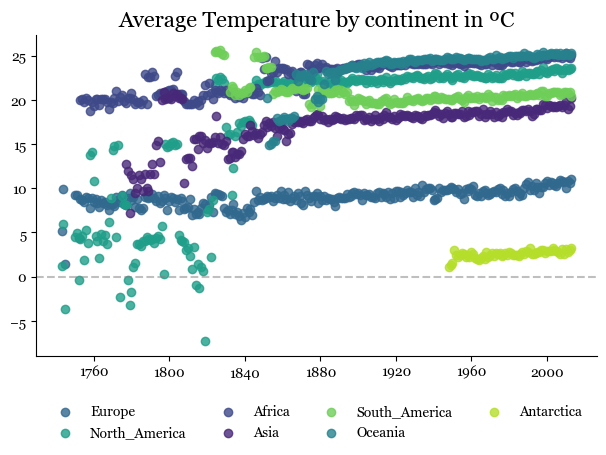

In [257]:
# Drawing the scatterplot by continent
# NOTE: Add a 0 ºC ref horizontal line

continent_time_series = df_year_temp \
.groupby(['Year', 'continent']) \
.mean(numeric_only = True) \
.reset_index() \
.assign(Year = lambda x: pd.to_datetime(x.Year, format= '%Y'))

# Testing font family
plt.rcParams['font.family'] = 'Georgia'


fig, ax = plt.subplots()

# Drawing series
for continent in continent_time_series.continent.unique():
    ax.scatter(continent_time_series.loc[lambda x: x.continent == continent, 'Year'], continent_time_series.loc[lambda x: x.continent == continent, 'AverageTemperature'],
                color = color_mapper_continent[continent], alpha= 0.8, label = continent)

# Ref line at 0ºC
ax.axhline(y = 0, color = 'gray', linestyle = '--', alpha = 0.5)


# Title and legend    
ax.set_title('Average Temperature by continent in ºC',  fontsize = 16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)

# Despine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Showing xticks every 20 years
#ax.xaxis.set_major_locator(mdates.YearLocator(20))

# Making the plot transparent, both figure and ax
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Proportions
fig.tight_layout()

#plt.savefig('scatterplot.svg', format='svg')
plt.show()


Comment here findings

### Visualizing Finland and Spain
Two series like the chart above.

In [258]:
f_sp_year_temp = df_year_temp \
.loc[lambda x: (x.Country == 'Finland') | (x.Country == 'Spain')] \
.assign(Year = lambda x: pd.to_datetime(x.Year, format= '%Y'))

f_sp_year_temp

,Country,Year,AverageTemperature,continent,iso_2,iso_3
14589,Finland,1743-01-01,-3.571000,Europe,FI,FIN
14590,Finland,1744-01-01,3.468750,Europe,FI,FIN
14591,Finland,1745-01-01,-9.080250,Europe,FI,FIN
14592,Finland,1746-01-01,NaN,Europe,FI,FIN
14593,Finland,1747-01-01,NaN,Europe,FI,FIN
...,...,...,...,...,...,...
40972,Spain,2009-01-01,14.968083,Europe,ES,ESP
40973,Spain,2010-01-01,14.246000,Europe,ES,ESP
40974,Spain,2011-01-01,15.321083,Europe,ES,ESP
40975,Spain,2012-01-01,14.580000,Europe,ES,ESP


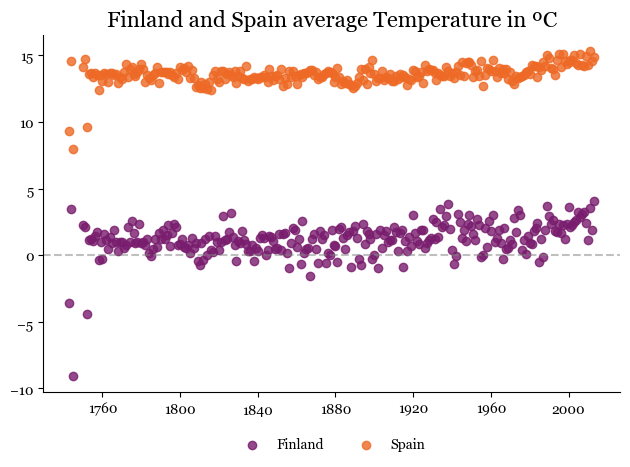

In [259]:
# Drawing the scatterplot of Finland vs Spain
# NOTE: Add a 0 ºC ref horizontal line

# Testing font family
plt.rcParams['font.family'] = 'Georgia'


fig, ax = plt.subplots()

# Drawing series
for country in f_sp_year_temp.Country.unique():
    ax.scatter(f_sp_year_temp.loc[lambda x: x.Country == country, 'Year'], f_sp_year_temp.loc[lambda x: x.Country == country, 'AverageTemperature'],
                color = color_mapper_f_sp[country], alpha= 0.8, label = country)

# Ref line at 0ºC
ax.axhline(y = 0, color = 'gray', linestyle = '--', alpha = 0.5)


# Title and legend    
ax.set_title('Finland and Spain average Temperature in ºC',  fontsize = 16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

# Despine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Showing xticks every 20 years
#ax.xaxis.set_major_locator(mdates.YearLocator(20))

# Making the plot transparent, both figure and ax
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Proportions
fig.tight_layout()

#plt.savefig('scatterplot.svg', format='svg')
plt.show()

---

### Reading and cleaning the 3 others data sets
- GDP
- Population 
- Geopandas

#### GDP Data

In [260]:
df_gdp = pd.read_csv('..\data\gdp-data\GDP_Country.csv', skiprows=4) # Reading GDP_Country csv file
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.862306e+09,2.861720e+09,2.963128e+09,3.025850e+09,3.191738e+09,3.359555e+09,3.380889e+09,2.752412e+09,3.225070e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.536964e+11,1.540611e+11,1.663621e+11,1.749528e+11,1.829721e+11,1.927209e+11,...,8.623341e+11,8.971645e+11,9.231439e+11,9.460928e+11,9.710653e+11,9.964178e+11,1.016728e+12,9.857923e+11,1.029191e+12,NaN
2,Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.918925e+10,1.971207e+10,1.999816e+10,2.045018e+10,2.099149e+10,2.124113e+10,2.207200e+10,2.155306e+10,1.708357e+10,NaN
3,Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.056755e+11,1.076147e+11,1.116749e+11,1.198082e+11,1.262691e+11,1.313913e+11,...,7.046760e+11,7.464664e+11,7.669580e+11,7.678299e+11,7.855332e+11,8.086763e+11,8.344802e+11,8.269667e+11,8.597592e+11,NaN
4,Angola,AGO,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.243377e+10,8.640707e+10,8.721930e+10,8.496904e+10,8.484159e+10,8.372481e+10,8.313874e+10,7.848297e+10,7.934628e+10,NaN


Drop unnecessary columns: 

In [261]:
df_gdp.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 66'], inplace=True)
df_gdp.rename(columns={"Country Name": "Country"}, inplace=True)
df_gdp.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.689383e+09,2.862306e+09,2.861720e+09,2.963128e+09,3.025850e+09,3.191738e+09,3.359555e+09,3.380889e+09,2.752412e+09,3.225070e+09
1,Africa Eastern and Southern,AFE,1.536964e+11,1.540611e+11,1.663621e+11,1.749528e+11,1.829721e+11,1.927209e+11,2.002638e+11,2.107883e+11,...,8.273424e+11,8.623341e+11,8.971645e+11,9.231439e+11,9.460928e+11,9.710653e+11,9.964178e+11,1.016728e+12,9.857923e+11,1.029191e+12
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.817151e+10,1.918925e+10,1.971207e+10,1.999816e+10,2.045018e+10,2.099149e+10,2.124113e+10,2.207200e+10,2.155306e+10,1.708357e+10
3,Africa Western and Central,AFW,1.056755e+11,1.076147e+11,1.116749e+11,1.198082e+11,1.262691e+11,1.313913e+11,1.290167e+11,1.166363e+11,...,6.641073e+11,7.046760e+11,7.464664e+11,7.669580e+11,7.678299e+11,7.855332e+11,8.086763e+11,8.344802e+11,8.269667e+11,8.597592e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.854575e+10,8.243377e+10,8.640707e+10,8.721930e+10,8.496904e+10,8.484159e+10,8.372481e+10,8.313874e+10,7.848297e+10,7.934628e+10


In [262]:
df_gdp = df_gdp.melt(id_vars=['Country', 'Country Code'], var_name='Year', value_name='GDP') # Melt the dataset to have a single column for the years
df_gdp.head()

,Country,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,1.536964e+11
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,1.056755e+11
4,Angola,AGO,1960,NaN


In [263]:
df_gdp.sort_values(by=['Country'], inplace=True) # Order by country name
df_gdp.head()

,Country,Country Code,Year,GDP
2396,Afghanistan,AFG,1969,NaN
4790,Afghanistan,AFG,1978,NaN
14632,Afghanistan,AFG,2015,1.999816e+10
15696,Afghanistan,AFG,2019,2.207200e+10
14100,Afghanistan,AFG,2013,1.918925e+10


#### Population data

In [264]:
df_pop = pd.read_csv('..\data\population-data\population_data.csv', skiprows=4) # Reading population_data csv file

Drop unnecesary columns:

In [265]:
df_pop.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 66'], inplace=True)
df_pop.rename(columns={"Country Name": "Country"}, inplace=True) # Rename Country column
df_pop.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [266]:
df_pop = df_pop.melt(id_vars=['Country', 'Country Code'], var_name='Year', value_name='Population') # Melt the dataset to have a single column for the years
df_pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54608.0
1,Africa Eastern and Southern,AFE,1960,130692579.0
2,Afghanistan,AFG,1960,8622466.0
3,Africa Western and Central,AFW,1960,97256290.0
4,Angola,AGO,1960,5357195.0


In [267]:
df_pop.sort_values(by=['Country'], inplace=True) # Order by country name
df_pop.head()

,Country,Country Code,Year,Population
2396,Afghanistan,AFG,1969,10494489.0
4790,Afghanistan,AFG,1978,12938862.0
14632,Afghanistan,AFG,2015,33753499.0
15696,Afghanistan,AFG,2019,37769499.0
14100,Afghanistan,AFG,2013,31541209.0


***
### Visualizing GDP, Population and land temperature

#### GDP and Population
Since both dataframes share all keys -understanding as key the combination of `('Country Code', 'year')` that unambiguously identifies a record-, it doesn't matter what kind of join we perform. See demo below:

In [268]:
pd.merge(df_gdp, df_pop, how ='left', on=['Year', 'Country Code'])

,Country_x,Country Code,Year,GDP,Country_y,Population
0,Afghanistan,AFG,1969,NaN,Afghanistan,10494489.0
1,Afghanistan,AFG,1978,NaN,Afghanistan,12938862.0
2,Afghanistan,AFG,2015,1.999816e+10,Afghanistan,33753499.0
3,Afghanistan,AFG,2019,2.207200e+10,Afghanistan,37769499.0
4,Afghanistan,AFG,2013,1.918925e+10,Afghanistan,31541209.0
...,...,...,...,...,...,...
16487,Zimbabwe,ZWE,1994,1.767185e+10,Zimbabwe,10858594.0
16488,Zimbabwe,ZWE,1993,1.617780e+10,Zimbabwe,10794918.0
16489,Zimbabwe,ZWE,1992,1.600947e+10,Zimbabwe,10641501.0
16490,Zimbabwe,ZWE,1989,1.558437e+10,Zimbabwe,9846346.0


In [269]:
# Full join
pd.merge(df_gdp, df_pop, how ='outer', on=['Year', 'Country Code'])

,Country_x,Country Code,Year,GDP,Country_y,Population
0,Afghanistan,AFG,1969,NaN,Afghanistan,10494489.0
1,Afghanistan,AFG,1978,NaN,Afghanistan,12938862.0
2,Afghanistan,AFG,2015,1.999816e+10,Afghanistan,33753499.0
3,Afghanistan,AFG,2019,2.207200e+10,Afghanistan,37769499.0
4,Afghanistan,AFG,2013,1.918925e+10,Afghanistan,31541209.0
...,...,...,...,...,...,...
16487,Zimbabwe,ZWE,1994,1.767185e+10,Zimbabwe,10858594.0
16488,Zimbabwe,ZWE,1993,1.617780e+10,Zimbabwe,10794918.0
16489,Zimbabwe,ZWE,1992,1.600947e+10,Zimbabwe,10641501.0
16490,Zimbabwe,ZWE,1989,1.558437e+10,Zimbabwe,9846346.0


In [270]:
# Inner
pd.merge(df_gdp, df_pop, how ='inner', on=['Year', 'Country Code'])

,Country_x,Country Code,Year,GDP,Country_y,Population
0,Afghanistan,AFG,1969,NaN,Afghanistan,10494489.0
1,Afghanistan,AFG,1978,NaN,Afghanistan,12938862.0
2,Afghanistan,AFG,2015,1.999816e+10,Afghanistan,33753499.0
3,Afghanistan,AFG,2019,2.207200e+10,Afghanistan,37769499.0
4,Afghanistan,AFG,2013,1.918925e+10,Afghanistan,31541209.0
...,...,...,...,...,...,...
16487,Zimbabwe,ZWE,1994,1.767185e+10,Zimbabwe,10858594.0
16488,Zimbabwe,ZWE,1993,1.617780e+10,Zimbabwe,10794918.0
16489,Zimbabwe,ZWE,1992,1.600947e+10,Zimbabwe,10641501.0
16490,Zimbabwe,ZWE,1989,1.558437e+10,Zimbabwe,9846346.0


As we see, any kind of join yields the same dataframe because of the explained reason. So, let's use the left join.

In [271]:
gdp_pop = pd.merge(df_gdp, df_pop, how ='left', on=['Year', 'Country Code']) \
.drop('Country_y', axis = 1) \
.rename({'Country_x': 'country_name',
         'Country Code': 'country_code'}, axis = 1) \
.assign(Year = lambda x: x.Year.astype(int))

gdp_pop

,country_name,country_code,Year,GDP,Population
0,Afghanistan,AFG,1969,NaN,10494489.0
1,Afghanistan,AFG,1978,NaN,12938862.0
2,Afghanistan,AFG,2015,1.999816e+10,33753499.0
3,Afghanistan,AFG,2019,2.207200e+10,37769499.0
4,Afghanistan,AFG,2013,1.918925e+10,31541209.0
...,...,...,...,...,...
16487,Zimbabwe,ZWE,1994,1.767185e+10,10858594.0
16488,Zimbabwe,ZWE,1993,1.617780e+10,10794918.0
16489,Zimbabwe,ZWE,1992,1.600947e+10,10641501.0
16490,Zimbabwe,ZWE,1989,1.558437e+10,9846346.0


#### Incorporating land temperature data
In previous sections, we added the `iso_3` field to the land temperature data in order to easily merge it with the GDP and Population dataframes, since they already come with this dimension.
And since we want to visualize GDP per capita vs land temperature, we will perform a left join on `year` and `iso_3` as follows:


In [272]:
# Creating combined dataframe, dropping all NAs. This may create non-homogeneous variance across categories
gdp_pop_land = pd.merge(gdp_pop, df_year_temp, how = 'left', left_on = ['country_code', 'Year'], right_on=['iso_3', 'Year']) \
.assign(gdp_per_capita = lambda x: x.GDP / x.Population) \
.dropna()

gdp_pop_land.head()

,country_name,country_code,Year,GDP,Population,Country,AverageTemperature,continent,iso_2,iso_3,gdp_per_capita
4,Afghanistan,AFG,2013,1.918925e+10,31541209.0,Afghanistan,16.533625,Asia,AF,AFG,608.386715
17,Afghanistan,AFG,2012,1.817151e+10,30466479.0,Afghanistan,14.481583,Asia,AF,AFG,596.442815
19,Afghanistan,AFG,2011,1.611631e+10,29249157.0,Afghanistan,15.518000,Asia,AF,AFG,551.000970
20,Afghanistan,AFG,2004,8.338756e+09,23553551.0,Afghanistan,15.770917,Asia,AF,AFG,354.033913
22,Afghanistan,AFG,2008,1.155979e+10,26427199.0,Afghanistan,15.216500,Asia,AF,AFG,437.420027


In [273]:
gdp_pop_land.groupby(by = ['Year', 'continent']).mean(numeric_only = True)

GDP    Population  AverageTemperature  \
Year continent                                                       
1960 Africa         1.295854e+10  8.157457e+06           24.132287   
     Asia           7.898841e+10  1.029486e+08           20.016928   
     Europe         2.440124e+11  2.146810e+07           12.534974   
     North_America  2.608391e+11  1.700741e+07           24.259315   
     Oceania        6.949467e+10  4.221328e+06           23.613750   
...                          ...           ...                 ...   
2013 Asia           5.645866e+11  1.009655e+08           20.259619   
     Europe         5.657089e+11  2.017607e+07           11.663187   
     North_America  7.587838e+11  2.054561e+07           23.412679   
     Oceania        1.065616e+11  2.744189e+06           25.430455   
     South_America  3.052906e+11  3.407963e+07           21.032750   

                    gdp_per_capita  
Year continent                      
1960 Africa            1253.021873  
     Asia              1436.191476  
     Europe           12725.799030  
     North_America     5029.155268  
     Oceania           7806.191997  
...                            ...  
2013 Asia             12508.529444  
     Europe           32639.772650  
     North_America    17599.222894  
     Oceania          14834.203998  
     South_America     8462.349838  

[324 rows x 4 columns]

In [274]:
gdp_per_capita_by_continent = gdp_pop_land \
.groupby(['Year', 'continent']) \
.agg({'GDP': 'sum',
      'Population': 'sum',
      'AverageTemperature': 'mean'}) \
.assign(gdp_per_capita = lambda x: x.GDP / x.Population) \
.reset_index()

gdp_per_capita_by_continent

,Year,continent,GDP,Population,AverageTemperature,gdp_per_capita
0,1960,Africa,3.757976e+11,2.365662e+08,24.132287,1588.551161
1,1960,Asia,1.184826e+12,1.544229e+09,20.016928,767.260910
2,1960,Europe,4.636235e+12,4.078939e+08,12.534974,11366.278864
3,1960,North_America,3.651748e+12,2.381038e+08,24.259315,15336.789239
4,1960,Oceania,2.084840e+11,1.266398e+07,23.613750,16462.749571
...,...,...,...,...,...,...
319,2013,Asia,2.371264e+13,4.240553e+09,20.259619,5591.873732
320,2013,Europe,2.715403e+13,9.684516e+08,11.663187,28038.602441
321,2013,North_America,2.048716e+13,5.547313e+08,23.412679,36931.686378
322,2013,Oceania,1.491862e+12,3.841865e+07,25.430455,38831.721791


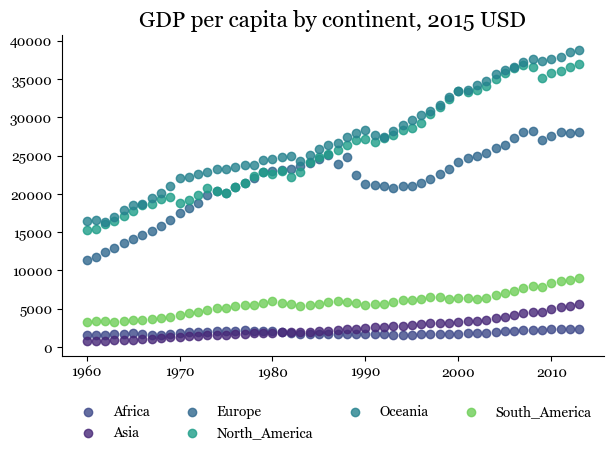

In [275]:
# Drawing the scatterplot by continent

# Testing font family
plt.rcParams['font.family'] = 'Georgia'


fig, ax = plt.subplots()

# Drawing series
for continent in gdp_per_capita_by_continent.continent.unique():
    ax.scatter(gdp_per_capita_by_continent.loc[lambda x: x.continent == continent, 'Year'], gdp_per_capita_by_continent.loc[lambda x: x.continent == continent, 'gdp_per_capita'],
                color = color_mapper_continent[continent], alpha= 0.8, label = continent)

# Title and legend    
ax.set_title('GDP per capita by continent, 2015 USD',  fontsize = 16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)

# Despine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Showing xticks every 20 years
#ax.xaxis.set_major_locator(mdates.YearLocator(20))

# Making the plot transparent, both figure and ax
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Proportions
fig.tight_layout()

plt.savefig('gdp_capita_continent.svg', format='svg')
plt.show()

* All continents but Africa show growing trends, with North America and Oceania having the sharpest.
* We can see the impact of 2008 in North America, Europe and Oceania
* South America and Asia were not affected
* Africa does not grow.
* From these chart, it looks like the continent wih the highest GDP per capita is Oceania. Australia and NZ have both very high GDP, and in Europe we have the east countries which lower the sum.
* Europe strange behavior since 1988?

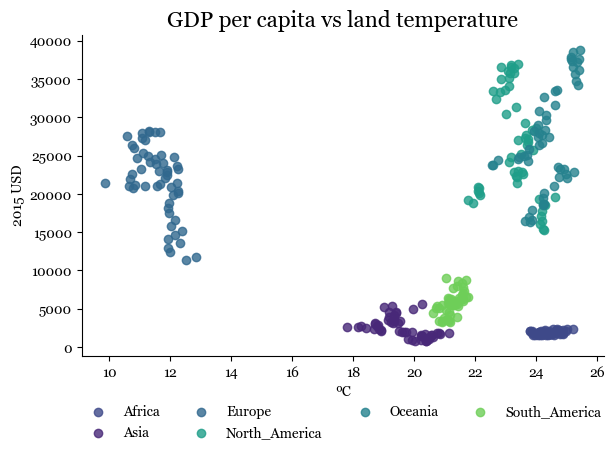

In [276]:
# Drawing the scatterplot by continent

# Testing font family
plt.rcParams['font.family'] = 'Georgia'


fig, ax = plt.subplots()

# Drawing series
for continent in gdp_per_capita_by_continent.continent.unique():
    ax.scatter(gdp_per_capita_by_continent.loc[lambda x: x.continent == continent, 'AverageTemperature'], gdp_per_capita_by_continent.loc[lambda x: x.continent == continent, 'gdp_per_capita'],
                color = color_mapper_continent[continent], alpha= 0.8, label = continent)

# Title, axes and legend   
ax.set_xlabel('ºC')
ax.set_ylabel('2015 USD')
ax.set_title('GDP per capita vs land temperature',  fontsize = 16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)

# Despine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Showing xticks every 20 years
#ax.xaxis.set_major_locator(mdates.YearLocator(20))

# Making the plot transparent, both figure and ax
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Proportions
fig.tight_layout()

#plt.savefig('gdp_capita_continent.svg', format='svg')
plt.show()

* Data clusters very well with these two variables
* It is clear that every poor continent has warm land
* However, this is not true the other way around: North America and Oceania are warm and wealthy
* Europe is the coldest and not as wealthy as North America or Oceania, but substantially wealthier than Asia, South America and Asia
* The poorest continents also happen to have the least variance 

***

#### Geopandas Dataset

In [277]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


#### Merge the 4 dataframes: 

It is important to Verify that the types of the `Year` column are the same in both dataframes:

In [278]:
df_year_temp.dtypes

Country                object
Year                    int64
AverageTemperature    float64
continent              object
iso_2                  object
iso_3                  object
dtype: object

In [279]:
df_gdp.dtypes

Country          object
Country Code     object
Year             object
GDP             float64
dtype: object

Since it is not the same, we pass it the `Year` column to `int` type:

In [280]:
# Replace inconsistent year types with their standardized types in both dataframes
df_year_temp['Year'] = df_year_temp['Year'].astype(str)
df_gdp['Year'] = df_gdp['Year'].astype(str)

An important final approach in order to merge correctly the dataframes is to replace the `Country` names with their standarized names in all the dataframes.

In [281]:
df_year_temp['Country'] = df_year_temp['Country'].replace(country_dict)
df_gdp['Country'] = df_gdp['Country'].replace(country_dict)
world['name'] = world['name'].replace(country_dict)

In [282]:
df_merged = df_year_temp.merge(df_gdp, on=['Country', 'Year'], how='inner') # Merge the two dataframes
df_merged = df_merged.merge(df_pop, on=['Country', 'Year'], how='inner')
df_merged.head()

,Country,Year,AverageTemperature,continent,iso_2,iso_3,Country Code_x,GDP,Country Code_y,Population
0,Afghanistan,1960,13.985417,Asia,AF,AFG,AFG,NaN,AFG,8622466.0
1,Afghanistan,1961,14.064917,Asia,AF,AFG,AFG,NaN,AFG,8790140.0
2,Afghanistan,1962,13.768667,Asia,AF,AFG,AFG,NaN,AFG,8969047.0
3,Afghanistan,1963,15.033417,Asia,AF,AFG,AFG,NaN,AFG,9157465.0
4,Afghanistan,1964,13.084917,Asia,AF,AFG,AFG,NaN,AFG,9355514.0


In [283]:
# Save merge dataset in clean-data folder
df_merged.to_csv('..\data\clean-data\merged_data.csv', index=False)

## Calculations

In [284]:
# Lets study the percentage of missing values
df_merged.isnull().sum()/len(df_merged)

Country               0.000000
Year                  0.000000
AverageTemperature    0.000000
continent             0.006024
iso_2                 0.006024
iso_3                 0.006024
Country Code_x        0.000000
GDP                   0.252677
Country Code_y        0.000000
Population            0.000000
dtype: float64

In [285]:
missing_counts = df_merged['GDP'].isna().groupby(df_merged['Country']).sum()
missing_counts.sort_values(ascending=False)

Country
Liechtenstein             54
New Caledonia             54
British Virgin Islands    54
Faroe Islands             54
Somalia                   53
                          ..
Kenya                      0
Japan                      0
Italy                      0
Benin                      0
Zimbabwe                   0
Name: GDP, Length: 166, dtype: int64

In [286]:
total_counts = df_merged['GDP'].groupby(df_merged['Country']).count()

In [287]:
country_data = pd.DataFrame({
    'Country': missing_counts.index,
    'Missing_Count': missing_counts.values,
})
country_data.head()

,Country,Missing_Count
0,Afghanistan,42
1,Albania,20
2,Algeria,0
3,American Samoa,42
4,Andorra,10


In [288]:
sorted_data = country_data.sort_values('Missing_Count', ascending = False)
sorted_data.head(10)

,Country,Missing_Count
89,Liechtenstein,54
109,New Caledonia,54
23,British Virgin Islands,54
51,Faroe Islands,54
141,Somalia,53
42,Djibouti,53
30,Cayman Islands,46
0,Afghanistan,42
115,Northern Mariana Islands,42
3,American Samoa,42


Lets study with `Year` has less and the most missing data.

In [289]:
# Let´s study witch `Year` has the most missing values
df_merged['GDP'].isna().groupby(df_merged['Year']).sum().sort_values(ascending=False).head(5)

Year
1960    90
1962    88
1963    88
1964    88
1961    88
Name: GDP, dtype: int64

In [290]:
# Let´s study witch `Year` has the less missing values
df_merged['GDP'].isna().groupby(df_merged['Year']).sum().sort_values(ascending=True).head(5)

Year
2013    5
2011    6
2010    6
2009    6
2008    6
Name: GDP, dtype: int64

Since 2013 is the Year with less missing data we are going to plot that one:



In [291]:
df_2013 = pd.DataFrame(df_merged[df_merged.Year == "2013"])
df_2013.head()

,Country,Year,AverageTemperature,continent,iso_2,iso_3,Country Code_x,GDP,Country Code_y,Population
53,Afghanistan,2013,16.533625,Asia,AF,AFG,AFG,1.918925e+10,AFG,31541209.0
107,Albania,2013,14.993875,Europe,AL,ALB,ALB,1.094547e+10,ALB,2895092.0
161,Algeria,2013,25.121500,Africa,DZ,DZA,DZA,1.541977e+11,DZA,38000626.0
215,American Samoa,2013,27.517250,Oceania,AS,ASM,ASM,6.411481e+08,ASM,52995.0
269,Andorra,2013,12.307875,Europe,AD,AND,AND,2.683225e+09,AND,71367.0


> **Note:** We will use the 2013 data to make our analysis:

In [292]:
df_2013_pop = df_2013[['Country', 'Population']] # 2013 Population
df_2013_gdp = df_2013[['Country', 'GDP']] # 2013 GDP
df_2013_temp = df_2013[['Country', 'AverageTemperature']] # 2013 Average Temperature


### Temperature Plot 2013



In [293]:
df_2013_temp.head()

,Country,AverageTemperature
53,Afghanistan,16.533625
107,Albania,14.993875
161,Algeria,25.121500
215,American Samoa,27.517250
269,Andorra,12.307875


In [294]:
data_map_2013_temp = world.merge(df_2013_temp, how = "left", left_on=["name"], right_on=["Country"]) # World map with 2013 Average Temperature
data_map_2013_temp.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,AverageTemperature
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,25.941375
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,22.772750
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,-1.640667
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [295]:
my_map = folium.Map()

folium.Choropleth(
    geo_data=data_map_2013_temp,
    name='choropleth',
    data=data_map_2013_temp,
    columns=['Country', 'AverageTemperature'],
    key_on='feature.properties.name',
    fill_color= 'Reds',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Average Temperature by Country 2013',
    tooltip=folium.features.GeoJsonTooltip(fields=['name', 'AverageTemperature'], 
        aliases=['Country', 'Average Temperature'], 
        labels=False, 
        sticky=False, 
        toLocaleString=True),
    # gradient_fill=color_scale
).add_to(my_map)

# Add the layer control to the map
folium.LayerControl().add_to(my_map)

# Save the map to an HTML file
my_map.save('..\ 2013_temp.html')

#### Temperature 2013 Map

In [296]:
my_map

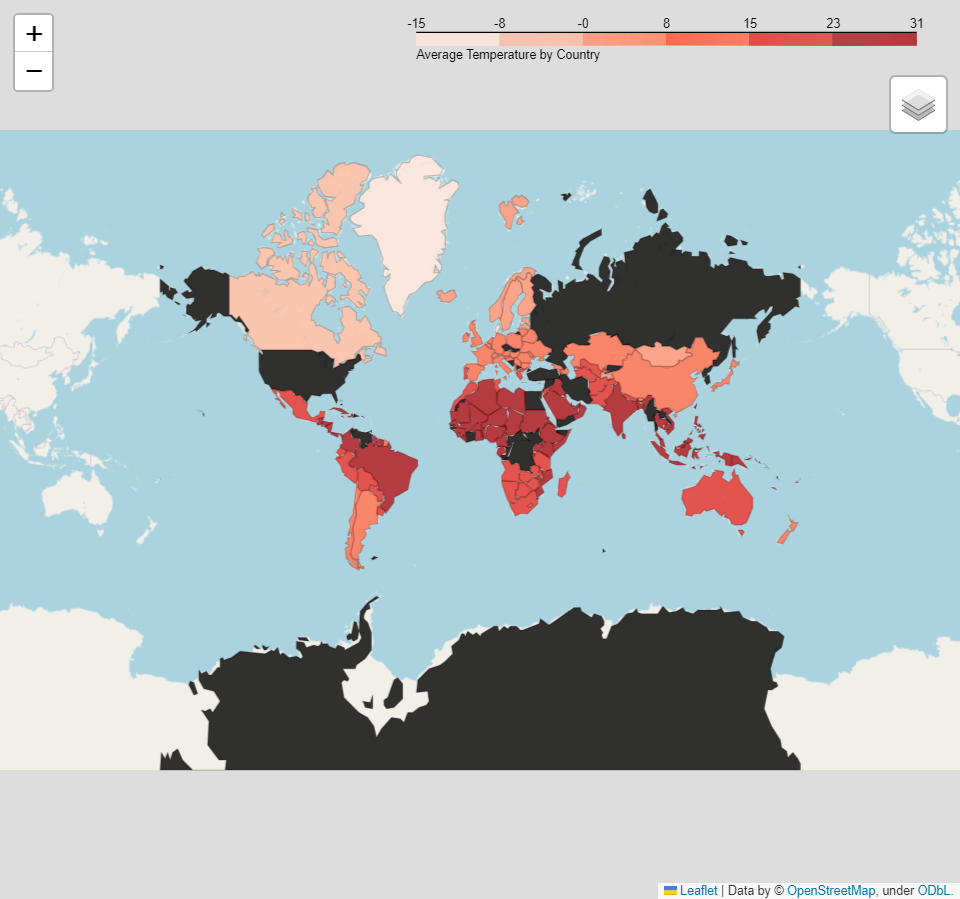

In [ ]:
# Since in some devices this notebook is not able to show the map, we are going to show a screenshot of the map
image = Image.open('../2013_temp.png')
display(image)

### GDP map 2013

In [ ]:
df_2013_gdp.head()

,Country,GDP
53,Afghanistan,1.918925e+10
107,Albania,1.094547e+10
161,Algeria,1.541977e+11
215,American Samoa,6.411481e+08
269,Andorra,2.683225e+09


In [ ]:
data_map_2013_gdp = world.merge(df_2013_gdp, how = "left", left_on=["name"], right_on=["Country"]) # World map with 2013 Average Temperature
data_map_2013_gdp.GDP = np.log2(data_map_2013_gdp.GDP) # We apllied a logarithm transformation to the data
data_map_2013_gdp.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,GDP
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,31.982469
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,35.283269
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,40.451149
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [ ]:
#Creating a threshold scale
n = 250 # number of elements in the vector
diff = (data_map_2013_gdp['GDP'].max() - data_map_2013_gdp['GDP'].min()) / n # fixed difference between elements
threshold_scale = list(np.arange(data_map_2013_gdp['GDP'].min(), data_map_2013_gdp['GDP'].max() + diff, diff))

my_map = folium.Map()

folium.Choropleth(
    geo_data=data_map_2013_gdp,
    name='choropleth',
    data=data_map_2013_gdp,
    columns=['Country', 'GDP'],
    key_on='feature.properties.name',
    fill_color= 'Spectral',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name=f"GDP range log transf 2013: {data_map_2013_gdp['GDP'].min():,.2f} to {data_map_2013_gdp['GDP'].max():,.2f}",
    tooltip=folium.features.GeoJsonTooltip(fields=['name', 'GDP'], 
        aliases=['Country', 'GDP'], 
        labels=False, 
        sticky=False, 
        toLocaleString=True),
    threshold_scale=threshold_scale,
    legend_format='',
).add_to(my_map)

folium.LayerControl().add_to(my_map)

my_map.save('..\ 2013_gdp.html')

#### GDP 2013 Map

In [ ]:
my_map

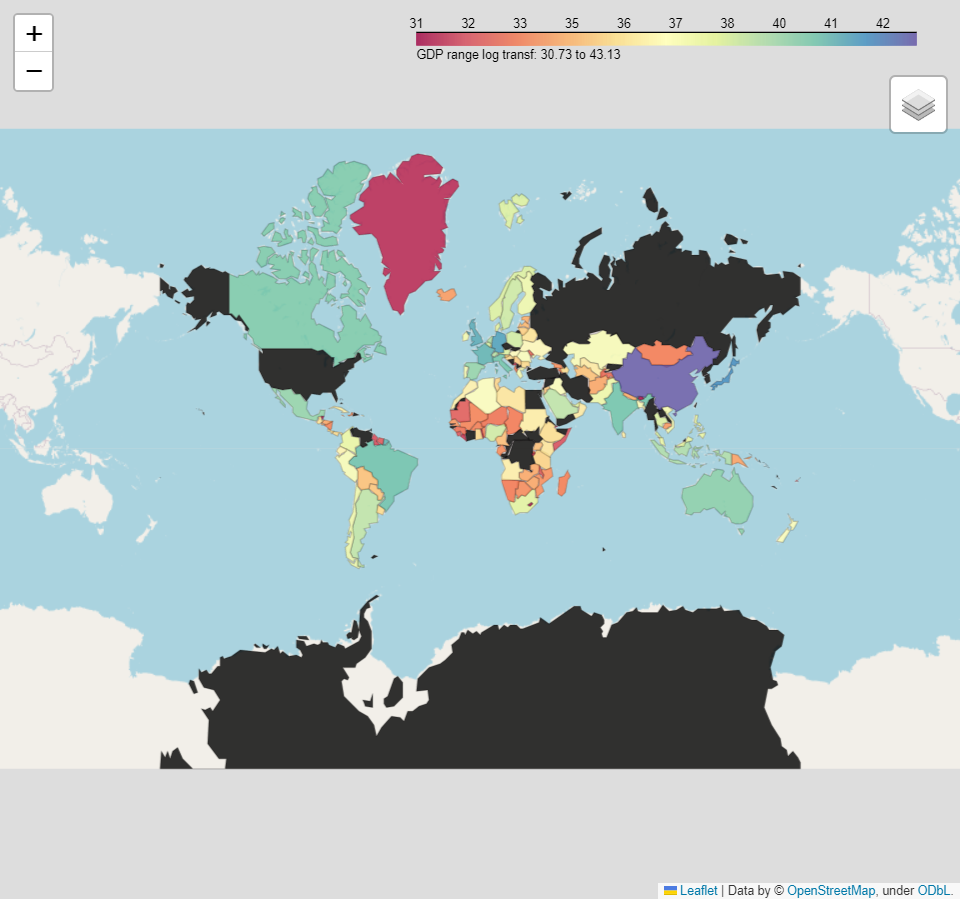

In [ ]:
# Since in some devices this notebook is not able to show the map, we are going to show a screenshot of the map
image = Image.open('../2013_gdp.png')
display(image)

### Population map 2013

In [ ]:
df_2013_pop.head()

,Country,Population
53,Afghanistan,31541209.0
107,Albania,2895092.0
161,Algeria,38000626.0
215,American Samoa,52995.0
269,Andorra,71367.0


In [ ]:
data_map_2013_pop = world.merge(df_2013_pop, how = "left", left_on=["name"], right_on=["Country"]) # World map with 2013 Population
data_map_2013_pop.Population = np.log2(data_map_2013_pop.Population ) # We apllied a logarithm transformation to the data
data_map_2013_gdp.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,GDP
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,31.982469
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,35.283269
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,40.451149
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [ ]:
#Creating a threshold scale
n = 250 # number of elements in the vector
diff = (data_map_2013_pop['Population'].max() - data_map_2013_pop['Population'].min()) / n # fixed difference between elements
threshold_scale = list(np.arange(data_map_2013_pop['Population'].min(), data_map_2013_pop['Population'].max() + diff, diff))

my_map = folium.Map()

folium.Choropleth(
    geo_data=data_map_2013_pop,
    name='choropleth',
    data=data_map_2013_pop,
    columns=['Country', 'Population'],
    key_on='feature.properties.name',
    fill_color= 'Spectral',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name=f"Population range lo transformation 2013: {data_map_2013_pop['Population'].min():,.2f} to {data_map_2013_pop['Population'].max():,.2f}",
    tooltip=folium.features.GeoJsonTooltip(fields=['name', 'Population'], 
        aliases=['Country', 'Population'], 
        labels=False, 
        sticky=False, 
        toLocaleString=True),
    threshold_scale=threshold_scale,
    legend_format='',
).add_to(my_map)

# Add the layer control to the map
folium.LayerControl().add_to(my_map)

# Save the map to an HTML file
my_map.save('..\ 2013_pop.html')

#### Population 2013 Map

In [ ]:
my_map

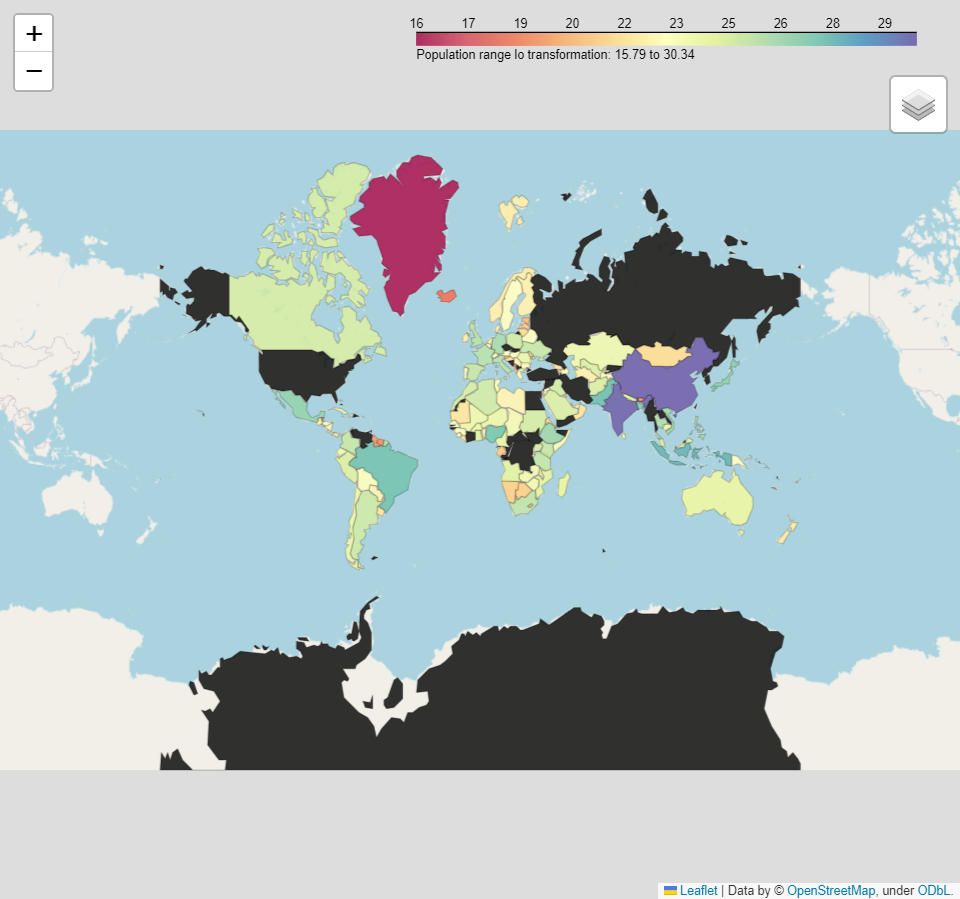

In [ ]:
# Since in some devices this notebook is not able to show the map, we are going to show a screenshot of the map
image = Image.open('../2013_pop.png')
display(image)